In [54]:
from proximitylib import *

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"

//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


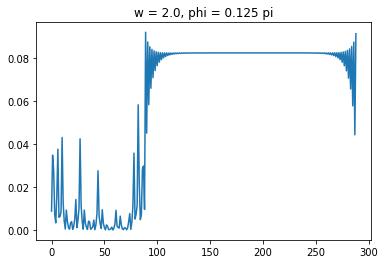

In [3]:
n = 9
wu = 2.0
phi = 1/8*np.pi
chain = hybrid_ring (chainAAH(n, wu = wu , phi = phi), chain1D(199,u = 0.75, v=-1.5), t_int = -1, beta = 2000)
plt.plot(chain.Delta)
plt.title("w = {}, phi = {} pi".format(wu, phi/np.pi))
plt.show()

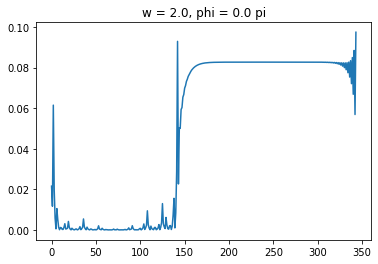

In [69]:
L = 144
wu = 2.0
phi = 0
chain = hybrid_ring (chainAAH(L-1, wu = wu , phi = phi), chain1D(199,u = 0.75, v=-1.5), t_int = -1, beta = 2000)
plt.plot(chain.Delta)
plt.title("w = {}, phi = {} pi".format(wu, phi/np.pi))
plt.show()

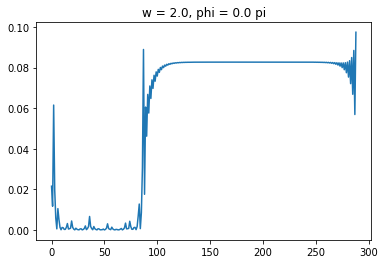

In [68]:
L = 89
wu = 2.0
phi = 0
chain = hybrid_ring (chainAAH(L-1, wu = wu , phi = phi), chain1D(199,u = 0.75, v=-1.5), t_int = -1, beta = 2000)
plt.plot(chain.Delta)
plt.title("w = {}, phi = {} pi".format(wu, phi/np.pi))
plt.show()

In [61]:
L = 1
wu = 2.0
phi = 2*np.pi*(-L)%(1+np.sqrt(5))
chainAAH(L, wu = wu , phi = phi)["u"]

array([ 1.96440375, -1.19473777])

In [25]:
N = 89
M = 55
A = np.cos(2*np.pi*M/N*np.arange(2*N))
A[A<10**-15] = 0
B = A[:N]-A[N:]
B[B<10**-10] = 0
np.array([B,A[:N],A[N:]]).T

array([[0.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.08813249, 0.08813249],
       [0.        , 0.60759392, 0.60759392],
       [0.        , 0.        , 0.        ],
       [0.        , 0.844706  , 0.844706  ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.93834396, 0.93834396],
       [0.        , 0.        , 0.        ],
       [0.        , 0.42705644, 0.42705644],
       [0.        , 0.29555818, 0.29555818],
       [0.        , 0.        , 0.        ],
       [0.        , 0.97765562, 0.97765562],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.76097879, 0.76097879],
       [0.        , 0.        , 0.        ],
       [0.        , 0.71331917, 0.71331917],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.99004851, 0.99004851],
       [0.

In [5]:
temp["u"]

array([ 2.99269215, -2.34873977,  0.47220852,  1.65212977, -2.90945832,
        2.6399524 , -0.98504414, -1.18679861,  2.73582953, -2.84914343,
        1.46727509,  0.68459439, -2.47720032,  2.96981345, -1.90391876,
       -0.16112027,  2.14160611, -2.99821331,  2.28140893, -0.36735975,
       -1.7394736 ,  2.93346065, -2.58801721,  0.88442614,  1.28329679,
       -2.77756729,  2.8142175 , -1.374014  , -0.78724879,  2.53537674,
       -2.95298189,  1.82091213,  0.26674149, -2.21441369,  2.99999908,
       -2.21123573,  0.2620533 ,  1.82465027, -2.95380826,  2.53285768,
       -0.78270626, -1.37819615,  2.81584455, -2.7757854 ,  1.27904105,
        0.88892238, -2.5903944 ,  2.93247129, -1.73563688, -0.37203038,
        2.2844624 , -2.99804721,  2.1383076 , -0.15642036, -1.90755364,
        2.97047578, -2.47454251,  0.68001122,  1.47137845, -2.85061362,
        2.73389501, -1.18247458, -0.98948849,  2.64218475, -2.90830718,
        1.64819923,  0.47685577, -2.35166494,  2.99236016, -2.06

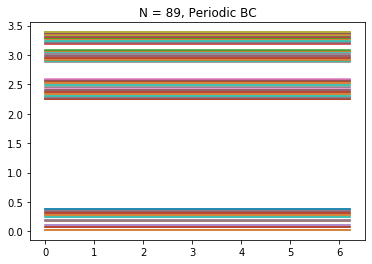

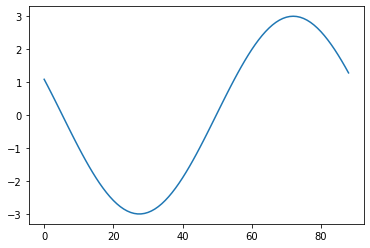

In [6]:
L = 88
N_trials = L+1
wu = 3
evals = []
phis = 2*np.pi/N_trials *np.arange(N_trials)
u_test = []
for phi in phis:
    temp = chainAAH(L, wu = wu, phi = phi, tau = 89/55)
#     temp["t"][0]=0
    chain = simple_ring(temp)
    evals.append(chain.evals)
    u_test.append(chain.chain["u"][L//2])
trajs = np.array(evals).transpose()
for traj in trajs:
    plt.plot(phis, traj)

plt.title("N = {}, Periodic BC".format(L+1))
plt.show()
plt.plot(u_test)

# phiss.append(phis)
# uus.append(u_test)


In [238]:
%store -r phis20
%store -r data20

Text(0.5, 0, '$\\phi$')

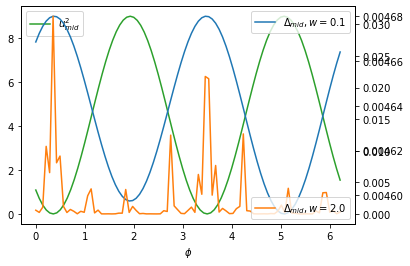

In [246]:
fig, ax1 = plt.subplots()

ax1.plot(phis,np.array(u_test)**2, "C2", label = "$u_{mid}^2$")


ax2 = ax1.twinx()
ax2.plot(phis01,np.array(data01), "C0", label = "$\Delta_{mid}, w = 0.1$")

ax3 = ax1.twinx()
ax3.plot(phis20,np.array(data20), "C1", label = "$\Delta_{mid}, w = 2.0$")

ax1.legend()
ax2.legend()
ax3.legend(loc = 4)

ax1.set_xlabel("$\phi$")

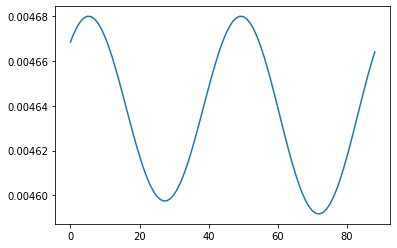

In [226]:
plt.plot(data20)

Text(0, 0.5, 'Delta_mid')

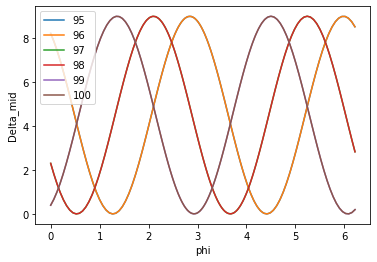

In [187]:
[plt.plot(phis,np.array(uu)**2) for phis,uu in zip(phiss,uus)]
plt.legend([len(uu)+1 for uu in uus])
plt.xlabel("phi")
plt.ylabel("Delta_mid")

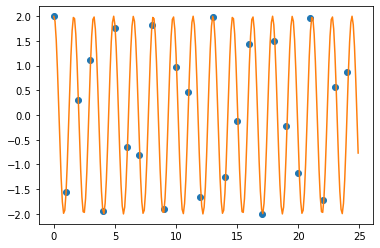

In [175]:
wu = 2.0
plt.plot(chainAAH(L, wu = wu , phi = phi)["u"][:25],"o")
plt.plot(np.arange(10*L)[:250]/10, wu*np.cos(2*np.pi/tau * 1/10*np.arange(10*L)[:250] + phi))

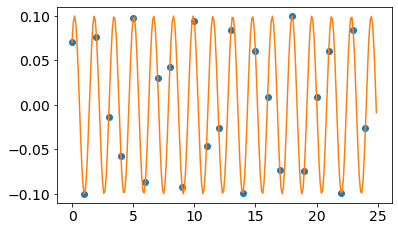

In [20]:
wu = 0.1
plt.plot(chainAAH(L, wu = wu , phi = phi)["u"][:25],"o")
plt.plot(np.arange(10*L)[:250]/10, wu*np.cos(2*np.pi/tau * 1/10*np.arange(10*L)[:250] + phi))


 41%|████      | 155/377 [25:52<35:50,  9.68s/it]


 82%|████████▏ | 309/377 [51:10<11:58, 10.56s/it]


100%|██████████| 377/377 [1:02:37<00:00,  9.68s/it]

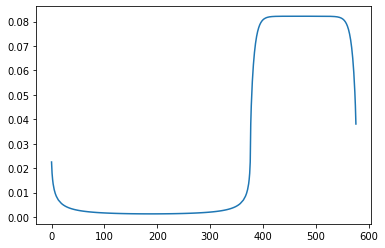

In [47]:
LSC = 199
n = 12
L = Fibonacci[n]
N_trials = (L)
Actual_Delta_mids = []
wu = 0.1
phis = 2*np.pi*np.arange(N_trials)/N_trials

Deltas = np.ones(L+1+LSC)
for i in tqdm(range(N_trials)):
    chain = hybrid_ring (chainAAH(n, wu = wu, phi = 2*np.pi*i/N_trials), chain1D(LSC,u = 0.75,v=-1.5), t_int = -1, beta = 2000)
    Deltas *= np.power(np.real(chain.Delta), 1/N_trials)
    Actual_Delta_mids.append(np.real(chain.Delta[L//2]))

Delta_avg = Deltas

plt.plot(Delta_avg)
plt.show()

In [48]:
data12 = Actual_Delta_mids

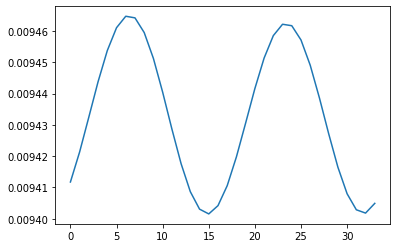

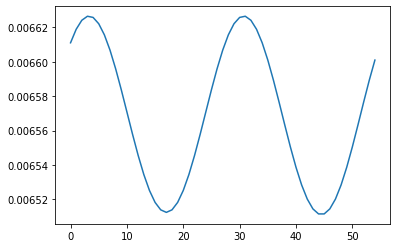

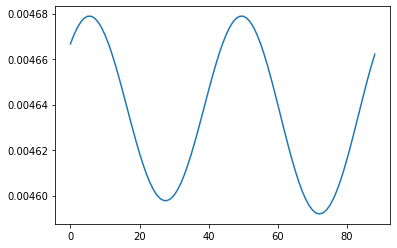

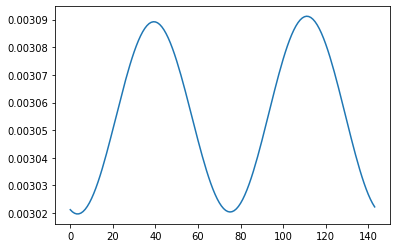

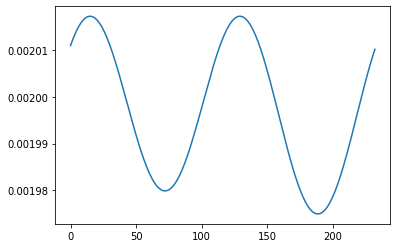

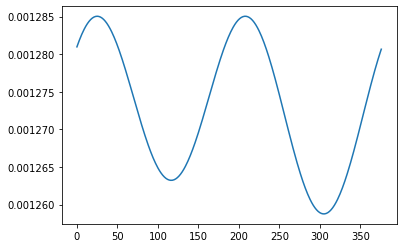

In [49]:
plt.plot(data7)
plt.show()
plt.plot(data8)
plt.show()
plt.plot(data9)
plt.show()
plt.plot(data10)
plt.show()
plt.plot(data11)
plt.show()
plt.plot(data12)
plt.show()
datas = [data7, data8, data9, data10, data11, data12]

In [50]:
data_avgs = []
for data in datas:
    nn = len(data)
    data_avg = np.prod(np.array(data)**(1/nn))
    data_avgs.append(data_avg)

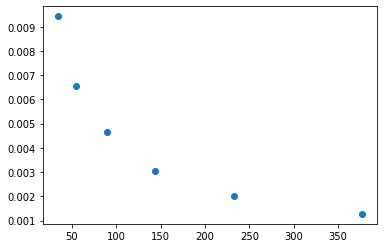

In [52]:
Lengths = Fibonacci[7:13]
plt.plot(Lengths,data_avgs, "o")

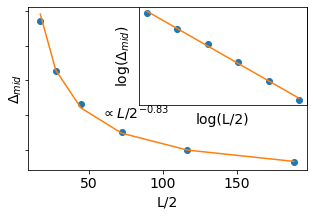

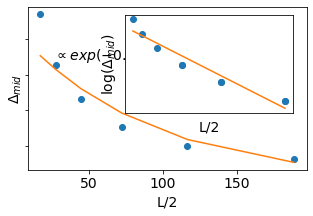

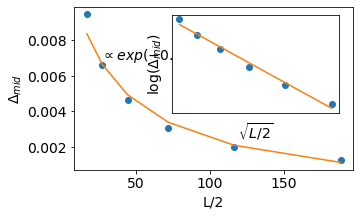

In [55]:
temp = scaling(np.array(Lengths)[:]/2, np.array(data_avgs)[:])

temp.fit_to_pow()
temp.fit_to_exp()
temp.fit_to_expstr()

In [56]:
pickle.dump((np.array(Lengths)[:]/2, np.array(data_avgs)[:]), open("AAH0p1ScalingObj.p","wb"))